# Predicting Customer Churn - Decicision Trees & Informative Attributes

## Setup

### Common imports

In [67]:
%matplotlib inline 

# Data processing libraries
import pandas as pd

# Data modeling library
from sklearn.tree import DecisionTreeClassifier

### Data loading

In [68]:
df = pd.read_csv('data/customer-churn.csv')
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,0,31953,0,6,313378,161,0,4,3,3,1,1
1,1,36147,0,13,800586,244,0,6,3,3,2,1
2,1,27273,230,0,305049,201,16,15,3,4,3,1
3,0,120070,38,33,788235,780,3,2,3,0,2,0
4,1,29215,208,85,224784,241,21,1,4,3,0,1


In [72]:
df.shape

(20000, 12)

In [73]:
df.columns

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL',
       'CONSIDERING_CHANGE_OF_PLAN', 'LEAVE'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   COLLEGE                      20000 non-null  int64
 1   INCOME                       20000 non-null  int64
 2   OVERAGE                      20000 non-null  int64
 3   LEFTOVER                     20000 non-null  int64
 4   HOUSE                        20000 non-null  int64
 5   HANDSET_PRICE                20000 non-null  int64
 6   OVER_15MINS_CALLS_PER_MONTH  20000 non-null  int64
 7   AVERAGE_CALL_DURATION        20000 non-null  int64
 8   REPORTED_SATISFACTION        20000 non-null  int64
 9   REPORTED_USAGE_LEVEL         20000 non-null  int64
 10  CONSIDERING_CHANGE_OF_PLAN   20000 non-null  int64
 11  LEAVE                        20000 non-null  int64
dtypes: int64(12)
memory usage: 1.8 MB


## Data Modeling

At this point, you have framed the problem and got the data, and explored it. Now, we will select and train a classification model using the tree induction technique explained in class.

We will use Scikit-learn to build our classification tree.

Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression, and other types of algorithms, including support vector machines.

Scikit-learn is designed to interoperate with NumPy and Pandas DataFrames.

### Fitting a classification tree

To build our decision tree using the customer churn dataset, we will use Scikit-learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class.

In [75]:
training = df.loc[:, df.columns != 'LEAVE']
labels = df['LEAVE']

The DecisionTreeClassifier class allows for different parameters that influence the learning process.

First, we will specify the depth as two and the criterion as entropy. The criterion refers to the impurity measure used to segment the data.

A shallow tree will give us some insights into the building process and easily interpret the results.

In [76]:
tree_depth_2 = DecisionTreeClassifier(
    criterion = "entropy", # “gini” or “entropy”, default=”gini”
    max_depth = 2)

The fit () method performs the building or fitting of the model to the data. This method takes two datasets for supervised learning algorithms:
- The first dataset contains the attributes 
- The second dataset contains the labels.

Any other parameter needed to guide the fitting process is considered a hyperparameter (such as the impurity measure and tree depth). It must be set as an instance variable, generally via a constructor parameter.

In [77]:
tree_depth_2.fit(training, labels)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

The following picture shows the resulting tree:

![Decision Tree Depth = 2](images/customer-churn_tree-depth-2.png)

**Classification tree with depth = 3 tree**

![Decision Tree Depth = 3](images/customer-churn_tree-depth-3.png)

**What is the difference between the depth=2 and depth=3 trees?**:

From the pictures, it is evident that as we increase the depth of the tree, the resulting leaves contain lower entropy values, suggesting more pure segments and increased predictable capability by the model.

### Making predictions

A classification model object, given a dataset, should be capable of making predictions.

Classification model objects have a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions.

To generate the predictions, we will use the same training dataset used for fitting the model:

In [78]:
labels_pred = tree_depth_2.predict(training)
labels_pred

array([0, 1, 0, ..., 0, 0, 0])

Using the classification model object, we will also calculate the class probabilities:

In [79]:
class_probabilities = tree_depth_2.predict_proba(training)
class_probabilities

array([[0.52994453, 0.47005547],
       [0.27339084, 0.72660916],
       [0.81143248, 0.18856752],
       ...,
       [0.52994453, 0.47005547],
       [0.52994453, 0.47005547],
       [0.61507761, 0.38492239]])

We will build a new DataFrame to display the class predictions and class probabilities:

In [80]:
# Turn LEAVE=0 to STAY and LEAVE=1 to CHURN for easier interpretation

interpret_label = lambda x: 'STAY' if x == 0 else 'CHURN'

In [81]:
# Interpret label values for both the training and predicted labels

labels_interpreted = list(map(interpret_label, labels))
labels_pred_interpreted = list(map(interpret_label, labels_pred))

In [82]:
prob_stay = [p[0] for p in class_probabilities]
prob_churn = [p[1] for p in class_probabilities]

In [83]:
predictions = pd.DataFrame({
    "Training label": labels_interpreted,
    "Predicted label": labels_pred_interpreted,
    "Probability STAY": prob_stay,
    "Probability CHURN": prob_churn,
})

predictions[:20]

,Training label,Predicted label,Probability STAY,Probability CHURN
0,CHURN,STAY,0.529945,0.470055
1,CHURN,CHURN,0.273391,0.726609
2,CHURN,STAY,0.811432,0.188568
3,STAY,STAY,0.615078,0.384922
4,CHURN,STAY,0.811432,0.188568
5,CHURN,STAY,0.615078,0.384922
6,CHURN,CHURN,0.273391,0.726609
7,CHURN,CHURN,0.273391,0.726609
8,CHURN,STAY,0.529945,0.470055
9,STAY,STAY,0.811432,0.188568


### Evaluating performance

As a simple measure of performance, we can compute the ratio between correct and wrong predictions.

Later in the course, we will look at more comprehensive ways to measure a classification model's performance that include concepts such as recall and precision.

In [84]:
def evaluate_performance(tree_clf, training, labels):
    labels_pred = tree_clf.predict(training)
    n_correct = sum(labels_pred == labels)    
    print(
        f"Model performance of tree depth={tree_clf.get_depth()}: {((n_correct / len(labels_pred)) * 100):.2f}%")

In [85]:
evaluate_performance(tree_depth_2, training, labels)

Model performance of tree depth=2: 64.58%


### Fine-tune your model

To improve the perfomance of our tree classifier, we will now build a tree with a higher depth (depth = 10) and evaluate its performance.

In [86]:
tree_depth_10 = DecisionTreeClassifier(
    max_depth = 10)

tree_depth_10.fit(training, labels)

DecisionTreeClassifier(max_depth=10)

In [87]:
evaluate_performance(tree_depth_10, training, labels)

Model performance of tree depth=10: 73.90%


From 64.58% we jumped to 73.89%. Not bad!

Now, we won't impose any restriction on the classifier, allowing the algorithm to determine the tree's depth:

In [88]:
tree_depth_free = DecisionTreeClassifier()
tree_depth_free.fit(training, labels)

DecisionTreeClassifier()

In [89]:
evaluate_performance(tree_depth_free, training, labels)

Model performance of tree depth=43: 100.00%


**Wait, what!?**

No error at all? Could this model really be absolutely perfect?

Of course, it is much more likely that something went wrong by letting the tree grow uncontrolled. Look at a depth of the tree: Above 40 levels! 

How can we know what the proper depth is? Definitely, we need a better mechanism for evaluating the performance of different trees to choose the proper depth and most realistic model.

We will look later into this problem in detail when learning about overfitting and its avoidance.

### Assessing feature importance

Lastly, we will compute feature importance values to gain insight into the criteria used by the induction algorithm to segment the training dataset.

In [90]:
feature_importances = pd.Series(
    tree_depth_free.feature_importances_,
    index=training.columns)

feature_importances.sort_values(inplace=True, ascending=False)
for feature in enumerate(feature_importances.index):
    print(f"{(feature[0]+1):02d}) {feature[1]:<30} {feature_importances[feature[0]]:.4f}")

01) HOUSE                          0.2146
02) INCOME                         0.1835
03) OVERAGE                        0.1459
04) HANDSET_PRICE                  0.1396
05) LEFTOVER                       0.0988
06) OVER_15MINS_CALLS_PER_MONTH    0.0495
07) AVERAGE_CALL_DURATION          0.0462
08) CONSIDERING_CHANGE_OF_PLAN     0.0410
09) REPORTED_USAGE_LEVEL           0.0373
10) REPORTED_SATISFACTION          0.0265
11) COLLEGE                        0.0171


<AxesSubplot:>

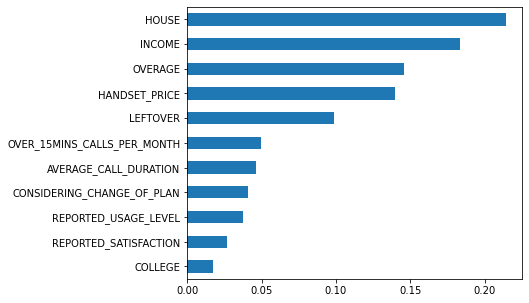

In [91]:
plt.figure(figsize=(GRAPH_WIDTH, GRAPH_HEIGHT))
feature_importances.sort_values(ascending=True).plot.barh()

## Evaluation

After selecting the model with the best combination of hyperparameters (e.g. the tree depth), the last step is to evaluate its performance and assess its generability.

We will leave this task for another class.

## References

Provost, F., & Fawcett, T. (2013). Data science for business: what you need to know about data mining and data-analytic thinking. Chapter 3.

Géron, A. (2019) Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. Chapter 2.